# HSLU FS18 - IPCV: Bürgler Exercise I - Filter (1)
##### Student: Adrian Kauz  
***

# Aufgabe 1: Faltung

Ein eindimensionales Bild enthalte die folgenden Graustufenwerte f = {0, 0, 0, 1, 1, 1, 1, 0, 0, 0}. Es soll mit der Maske w = {1, 2, 2, 2, 1} gefaltet werden.
Berechnen Sie die Faltung ( f ⋆ w) von Hand und zur Kontrolle mit Hilfe geeigneter Python-Befehle. Auf was ist bei der Berechnung zu achten?



In [20]:
import numpy as np
import cv2

In [21]:
f = np.array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0])
w = np.array([ 1, 2, 2, 2, 1])
print(np.convolve(f, w))

f = np.array([0, 0, 0, 1, 1, 0, 0, 0])
w = np.array([ 1, 2, 3, 2, 1])
print(np.convolve(f, w))

[0 0 0 1 3 5 7 7 5 3 1 0 0 0]
[0 0 0 1 3 5 5 3 1 0 0 0]


# Aufgabe 2: Faltung und Barker-Codes

Falten Sie den Barker-Code der Länge $4$ ($\left\{x_1[n]\right\}=\left\{1,1,-1,1\right\}$)
mit der Folge $\left\{x_2[n]\right\}=\left\{1,-1,1,1\right\}$. Wo hat die Faltung ihr
Maximum? Man kann zeigen: faltet man eine Barker-Codefolge mit ihrer zeitumgekehrten
Folge, entsteht ein sehr eindeutiges Maximum bei der Länge der Barker-Codefolge.

Man erhält: $\left\{y[n]\right\}=\left\{1,0,-1,4,-1,0,1\right\}$

Mit Hilfe von Python kann man dieses Resultat wie folgt erhalten:

In [22]:
b = np.array([1, 1, -1, 1])
binv = b[::-1]
print(b)
print(binv)
y = np.convolve(b, binv,"full")
print(y)

[ 1  1 -1  1]
[ 1 -1  1  1]
[ 1  0 -1  4 -1  0  1]


In [23]:
from matplotlib.pyplot import *


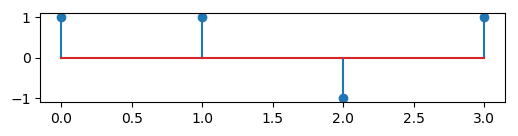

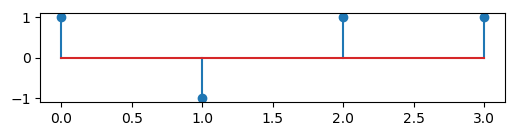

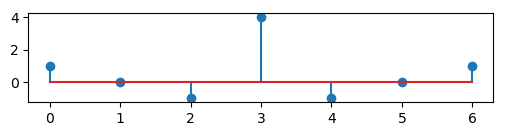

In [24]:
rcParams['figure.dpi']= 100
figure()
subplot(3, 1, 1)
stem(b)

figure()
subplot(3, 1, 1)
stem(binv)

figure()
subplot(3, 1, 1)
stem(y)
show()

# Aufgabe 3: Korrelation


Berechnen Sie von Hand und mit MATLAB die Korrelation corr(f,g)k für f = {1, 1,, 0, 0, 1, 1, 0, 0} und g = {0, 1, 1, 0} und zwar mit Nullpadding.

In [25]:
f1 = np.array([1, 1, 0, 0, 1, 1, 0, 0])
f2 = np.array([0, 1, 1, 0])
result = np.correlate(f1, f2, "full")
print(result)

[0 1 2 1 0 1 2 1 0 0 0]


# Aufgabe 4: Kantendetektion

Verwenden Sie die verschiedenen Filter zur Detektion der Kanten im Bild DIP+MatLab-Gonzalesetal-F04.09a.tif1.
Kommentieren Sie die Resultate und vergleichen Sie mit dem Sitznachbar.

Zuerst verwenden wir manuell erstellte Laplace Kernel um das Bild zu filtern:

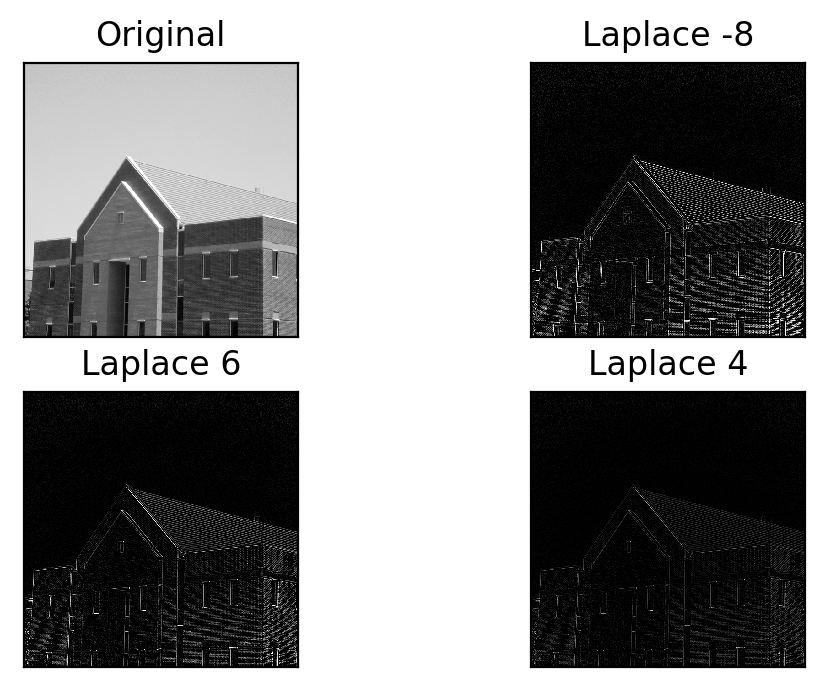

In [26]:
img = cv2.imread('images/gonzales.png')
rcParams['figure.dpi']= 200

laplaceKernel = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]])
laplaceKernel2 = np.array([[0, -1, -1], [-1, 6, -1], [-1, -1, 0]])
laplaceKernel3 = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])

subplot(2, 2, 1), imshow(img), title("Original"), xticks([]), yticks([])
subplot(2, 2, 2), imshow(cv2.filter2D(img, -1, laplaceKernel)), title("Laplace -8"), xticks([]), yticks([])
subplot(2, 2, 3), imshow(cv2.filter2D(img, -1, laplaceKernel2)), title("Laplace 6"), xticks([]), yticks([])
subplot(2, 2, 4), imshow(cv2.filter2D(img, -1, laplaceKernel3)), title("Laplace 4"), xticks([]), yticks([])
show()


Das gleiche mit Sobel Kernel:

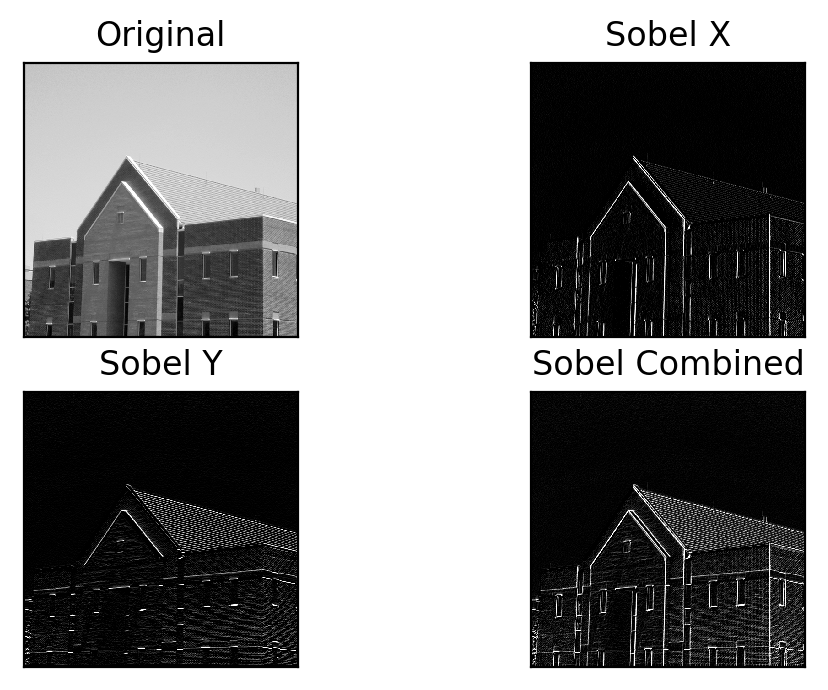

In [27]:
img = cv2.imread('images/gonzales.png')
#Bildgrösse
rcParams['figure.dpi']= 200

#Je einen Kernel für Horizontale und Vertikale Kanten
sobelKernelY = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobelKernelX = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

sobelX = cv2.filter2D(img, -1, sobelKernelX)
sobelY = cv2.filter2D(img, -1, sobelKernelY)

#Die beiden Bilder können kombiniert werden
sobelCombined = cv2.add(sobelX, sobelY)

subplot(2, 2, 1), imshow(img), title("Original"), xticks([]), yticks([])
subplot(2, 2, 2), imshow(sobelX), title("Sobel X"), xticks([]), yticks([])
subplot(2, 2, 3), imshow(sobelY), title("Sobel Y"), xticks([]), yticks([])
subplot(2, 2, 4), imshow(sobelCombined), title("Sobel Combined"), xticks([]), yticks([])
show()

Die Bilder können auch direkt mit OpenCV Funktionen gefiltert werden:

* Der "ddepth" parameter in cv2.Laplacian wird hier -1 gesetzt, was so viel bedeutet, dass die Ausgabe dieselbe Tiefe wie die Eingabe hat. Andere Parameter wären cv2.CV_8U (für unsigned char), cv2.CV_8S (für signed char), cv2.CV_16U (für unsigned short), cv2.CV_64F (für 64-bit float) usw.
* 

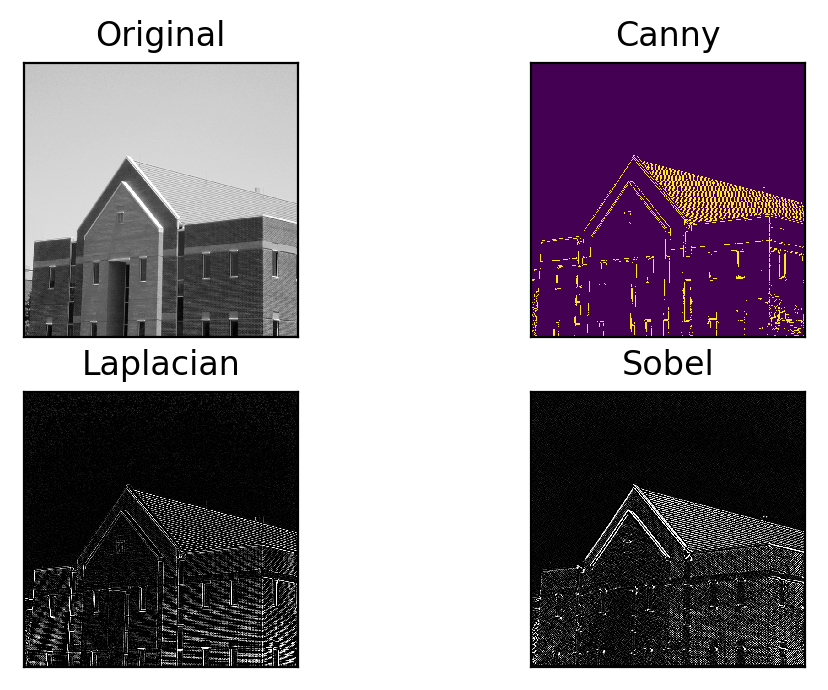

In [28]:
img = cv2.imread('images/gonzales.png')

edges1 = cv2.Canny(img, 100, 200)
edges2 = cv2.Laplacian(img, -1, ksize=3)
edges3 = cv2.Sobel(img, -1, 1, 1, ksize=5)

rcParams['figure.dpi']= 200
subplot(2, 2, 1), imshow(img), title("Original"), xticks([]), yticks([])
subplot(2, 2, 2), imshow(edges1), title("Canny"), xticks([]), yticks([])
subplot(2, 2, 3), imshow(edges2), title("Laplacian"), xticks([]), yticks([])
subplot(2, 2, 4), imshow(edges3), title("Sobel"), xticks([]), yticks([])
show()



# Aufgabe 5: Laplacefilter

Wir verbessern nun ein Bild mit dem Laplace-Filter
\begin{align*}
  \Delta f(x,y) \equiv {\nabla}^2 f(x,y) &= \frac{\partial^2 f(x,y)}{\partial x^2}
    + \frac{\partial^2 f(x,y)}{\partial y^2}\nonumber
\end{align*}
wobei $\displaystyle \frac{\partial^2 f(x,y)}{\partial x^2}$
für das zweimalige (partielle) Ableiten von $f(x,y)$ nach $x$ steht.

Eine diskrete Approximation der zweiten Ableitung kann wie folgt
hergeleitet werden: Zuerst wird die erste Ableitung links (bei
$x-1/2$) und rechts (bei $x+1/2)$) des Punktes $(x,y)$ ausgerechnet
\begin{align*}
  \frac{\partial f(x-1/2,y)}{\partial x} &= f(x,y) - f(x-1,y)\\
  \frac{\partial f(x+1/2,y)}{\partial x} &= f(x+1,y) - f(x,y)
\end{align*}
Anschliessend wird die zweite Ableitung als nochmalige
Ableitung der ersten Ableitung berechnet
\begin{align*}
  \frac{\partial^2 f(x,y)}{\partial x^2} &=
    \frac{\partial f(x+1/2,y)}{\partial x}
    - \frac{\partial f(x-1/2,y)}{\partial x}\\
    &= f(x+1,y) - f(x,y) - \left(f(x,y) - f(x-1,y)\right)\\
    &= f(x+1,y) - 2 f(x,y) + f(x-1,y)
\end{align*}
Analog berechnet man die zweite partielle Ableitung
$\displaystyle \frac{\partial^2 f(x,y)}{\partial y^2}$.
Man hat also approximativ
\begin{align*}
  {\nabla}^2 f(x,y)
    &= \left[f(x+1,y) + f(x-1,y) + f(x,y+1) + f(x,y-1) - 4 f(x,y)\right]
\end{align*}

Dem entspricht der folgende Filterkernel


In [29]:
w = [[0, 1, 0], [1, -4, 1], [0, 1, 0]]

Ein auch oft verwendete Filterkernel für den Laplacefilter ist:

In [30]:
w = [[1, 1, 1], [1, -6, 1], [1, 1, 1]]

Oft sind auch die Vorzeichen in anderen Implementationen genau
umgekehrt: das soll aber nicht weiter stören --- es ist reine
Definitionsangelegenheit!

Die Bildverbesserung mit Hilfe eines Laplacefilters basiert auf der
Idee das Inputbild $f(x,y)$ folgendermassen zu ergänzen:
\begin{align*}
  g(x,y) &= f(x,y) + c\left[{\nabla}^2 f(x,y)\right]
\end{align*}
Zum ursprünglichen Bild wird ein Vielfaches (deshalb die Konstante
$c\in\mathbb{R}$) der Kanten/Ecken addiert was das Bild optisch
schärfer wirken lässt.

Wir wollen diese Behauptung mit Hilfe eines Beispiels überprüfen.
Dazu lesen wir das Bild des Mondes ein, spezifizieren den oben
als erstes gezeigten Laplacefilter und bearbeiten das Bild entsprechend:


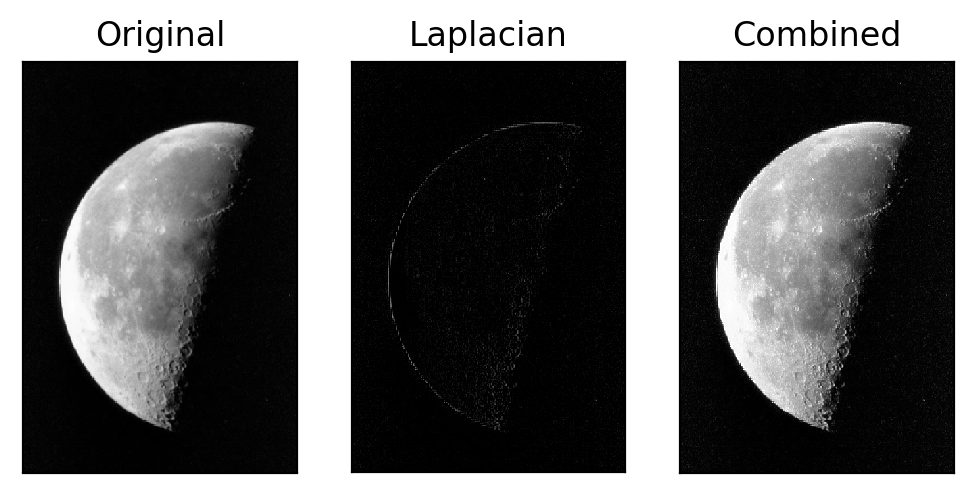

In [31]:
img = cv2.imread('images/moon.jpg')
kernel = np.array([[0,-1,0], [-1,4,-1], [0,-1,0]])
filtered = cv2.filter2D(img, -1, kernel)
combined = cv2.add(img, filtered)

rcParams['figure.dpi']= 200
subplot(1, 3, 1), imshow(img), title("Original"), xticks([]), yticks([])
subplot(1, 3, 2), imshow(filtered), title("Laplacian"), xticks([]), yticks([])
subplot(1, 3, 3), imshow(combined), title("Combined"), xticks([]), yticks([])
show()


# Aufgabe 6: Mask Median Filter

Beim Mask Median Filter wird der Median nicht über alle Pixel des Filterfensters genommen sondern lediglich über die markierten. Dies kann verwendet werden, um beispielsweise vertikale Kratzer zu entfernen. Dazu wird eine counterscratch-Maske verwendet, welche Pixel senkrecht zum Kratzer inkludiert wie die folgende Abbildung zeigt.

![](MaskMedian.png)
Erzeugen Sie im Bild DIP+MatLab-Gonzalesetal-F04.09a.tif einen mehr oder weniger langen und vertikalen Kratzer von 1-2 Pixeln Breite und entfernen Sie diesen mit Hilfe geeigneter MATLAB-Befehle. Schrei- ben Sie die Befehle auf und zeigen Sie das verkratzte Original sowie das verbesserte Bild.

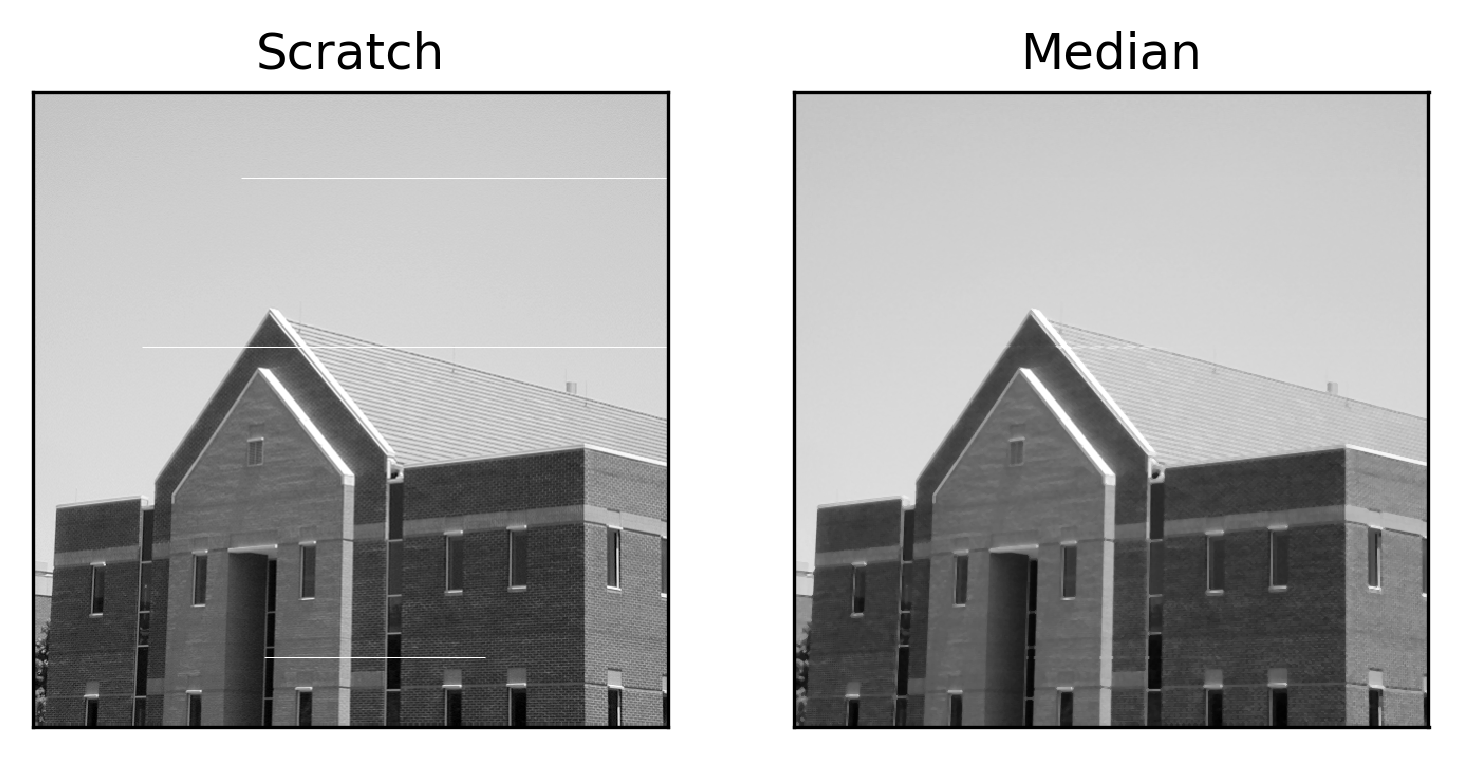

In [32]:
scratch = cv2.imread("images/gonzalesscratch.png")
blur = cv2.medianBlur(scratch, 3)
# blurWithKernel = np.array([[1,2,1], [2,4,2], [1,2,1]], dtype=np.float32)/16
blurWithKernel = np.array([[1,2,1], [2,4,2], [1,2,1]])
#blur = cv2.filter2D(scratch, -1, blurWithKernel)


rcParams['figure.dpi']= 300
subplot(1, 2, 1), imshow(scratch), title("Scratch"), xticks([]), yticks([])
subplot(1, 2, 2), imshow(blur), title("Median"), xticks([]), yticks([])
show()

## Anhang

Wie man "Ableitungen" des Bildes auch noch berechnen kann:

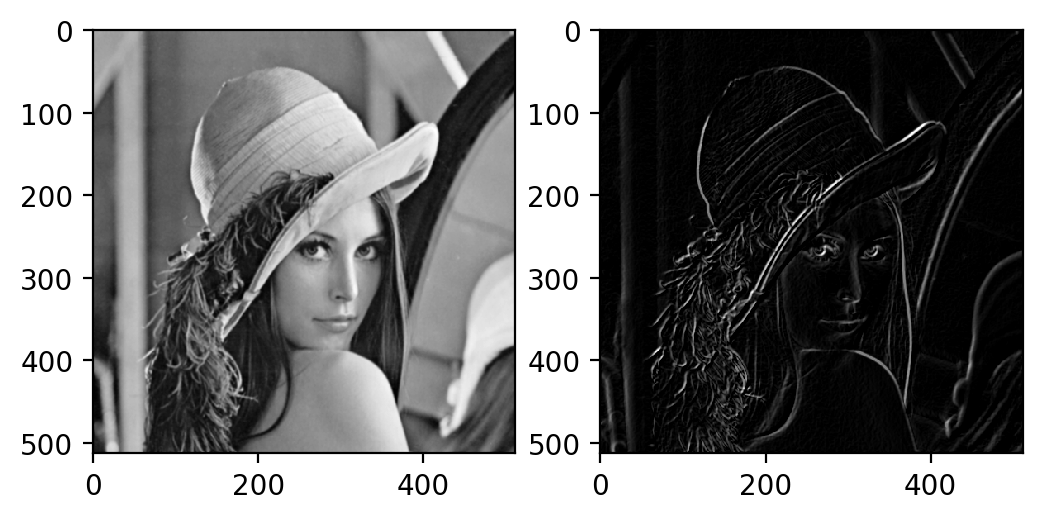

In [33]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
rcParams['figure.dpi']= 200
scale = 1
delta = 0
ddepth = -1
#ddepth = cv2.CV_16S

img = cv2.imread('images/lena.png')
img = cv2.GaussianBlur(img,(3,3),0)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Gradient-X
grad_x = cv2.Sobel(gray,ddepth,1,0,ksize=3,scale=scale,delta=delta,borderType=cv2.BORDER_DEFAULT)
#grad_x = cv2.Scharr(gray,ddepth,1,0)

# Gradient-Y
grad_y = cv2.Sobel(gray,ddepth,0,1,ksize=3,scale=scale,delta=delta,borderType=cv2.BORDER_DEFAULT)
#grad_y = cv2.Scharr(gray,ddepth,0,1)

abs_grad_x = cv2.convertScaleAbs(grad_x)   # converting back to uint8
abs_grad_y = cv2.convertScaleAbs(grad_y)

dst = cv2.addWeighted(abs_grad_x,0.5,abs_grad_y,0.5,0)
#dst = cv2.add(abs_grad_x,abs_grad_y)

plt.subplot(1,2,1), plt.imshow(gray,cmap = 'gray')
plt.subplot(1,2,2), plt.imshow(dst,cmap = 'gray')
#abs_grad_x.size
plt.show()

Die Behandlung des Randes wird durch $\texttt{borderType}$ definiert. Dieses Flag definiert, welcher Rand addiert wird, damit z.B. der Sobel-Filter auf Randpixel angewendet werden kann. Es gibt folgende Typen:

* cv2.BORDER_CONSTANT - Adds a constant colored border. The value should be given as next argument.
* cv2.BORDER_REFLECT - Border will be mirror reflection of the border elements, like this : fedcba|abcdefgh|hgfedcb
* cv2.BORDER_REFLECT_101 or cv2.BORDER_DEFAULT - Same as above, but with a slight change, like this : gfedcb|abcdefgh|gfedcba
* cv2.BORDER_REPLICATE - Last element is replicated throughout, like this: aaaaaa|abcdefgh|hhhhhhh
* cv2.BORDER_WRAP - Can’t explain, it will look like this : cdefgh|abcdefgh|abcdefg

Wenn man sich nicht sicher ist, was die einzelnen Paramter einer Funktion bedeuten, kann man sich die Hilfe wie folgt anzeigen lassen:

In [34]:
print(cv2.Sobel.__doc__)

Sobel(src, ddepth, dx, dy[, dst[, ksize[, scale[, delta[, borderType]]]]]) -> dst
.   @brief Calculates the first, second, third, or mixed image derivatives using an extended Sobel operator.
.   
.   In all cases except one, the \f$\texttt{ksize} \times \texttt{ksize}\f$ separable kernel is used to
.   calculate the derivative. When \f$\texttt{ksize = 1}\f$, the \f$3 \times 1\f$ or \f$1 \times 3\f$
.   kernel is used (that is, no Gaussian smoothing is done). `ksize = 1` can only be used for the first
.   or the second x- or y- derivatives.
.   
.   There is also the special value `ksize = #FILTER_SCHARR (-1)` that corresponds to the \f$3\times3\f$ Scharr
.   filter that may give more accurate results than the \f$3\times3\f$ Sobel. The Scharr aperture is
.   
.   \f[\vecthreethree{-3}{0}{3}{-10}{0}{10}{-3}{0}{3}\f]
.   
.   for the x-derivative, or transposed for the y-derivative.
.   
.   The function calculates an image derivative by convolving the image with the appropriate kernel:
.

In [35]:
print(cv2.dilate.__doc__)

dilate(src, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]]) -> dst
.   @brief Dilates an image by using a specific structuring element.
.   
.   The function dilates the source image using the specified structuring element that determines the
.   shape of a pixel neighborhood over which the maximum is taken:
.   \f[\texttt{dst} (x,y) =  \max _{(x',y'):  \, \texttt{element} (x',y') \ne0 } \texttt{src} (x+x',y+y')\f]
.   
.   The function supports the in-place mode. Dilation can be applied several ( iterations ) times. In
.   case of multi-channel images, each channel is processed independently.
.   
.   @param src input image; the number of channels can be arbitrary, but the depth should be one of
.   CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.
.   @param dst output image of the same size and type as src.
.   @param kernel structuring element used for dilation; if elemenat=Mat(), a 3 x 3 rectangular
.   structuring element is used. Kernel can be created using #getStruct

In [36]:
print(cv2.Canny.__doc__)

Canny(image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]]) -> edges
.   @brief Finds edges in an image using the Canny algorithm @cite Canny86 .
.   
.   The function finds edges in the input image and marks them in the output map edges using the
.   Canny algorithm. The smallest value between threshold1 and threshold2 is used for edge linking. The
.   largest value is used to find initial segments of strong edges. See
.   <http://en.wikipedia.org/wiki/Canny_edge_detector>
.   
.   @param image 8-bit input image.
.   @param edges output edge map; single channels 8-bit image, which has the same size as image .
.   @param threshold1 first threshold for the hysteresis procedure.
.   @param threshold2 second threshold for the hysteresis procedure.
.   @param apertureSize aperture size for the Sobel operator.
.   @param L2gradient a flag, indicating whether a more accurate \f$L_2\f$ norm
.   \f$=\sqrt{(dI/dx)^2 + (dI/dy)^2}\f$ should be used to calculate the image gradient 

50 verschiedene Anwendungen des Strukturelementes finden Sie im Artikel "Python cv2.getStructuringElement() Examples"
(https://www.programcreek.com/python/example/89381/cv2.getStructuringElement).